## Logistic Regression

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [180]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

In [181]:
my_data = np.concatenate((iris["data"],np.array([iris["target"]]).T),axis=1)
np.random.shuffle(my_data)

In [182]:
x = my_data[:, :-1]
y = (my_data[:,-1] != 0) * 1

In [183]:
x[:1]

array([[5.5, 3.5, 1.3, 0.2]])

In [184]:
y[:5]

array([0, 0, 1, 0, 0])

In [185]:
train_data = []
train_labels = []
test_data = []
test_labels = []
validation_data = []
validation_labels = []

In [186]:
for i, sample in enumerate(x):
    rand = rd.uniform(0,1)
    if rand < 0.7:
        train_data.append(np.concatenate(([1],sample)))
        train_labels.append(y[i])
    elif rand < 0.85:
        validation_data.append(np.concatenate(([1],sample)))
        validation_labels.append(y[i])
    else:
        test_data.append(np.concatenate(([1],sample)))
        test_labels.append(y[i])

In [187]:
train_data[:5]

[array([1. , 4.4, 2.9, 1.4, 0.2]),
 array([1. , 4.8, 3. , 1.4, 0.3]),
 array([1. , 6.7, 3.3, 5.7, 2.5]),
 array([1. , 6.4, 3.2, 5.3, 2.3]),
 array([1. , 6.4, 2.7, 5.3, 1.9])]

In [188]:
train_labels[:5]

[0, 0, 1, 1, 1]

In [189]:
len(train_data), len(train_labels)

(106, 106)

In [190]:
len(validation_data), len(validation_labels)

(19, 19)

In [191]:
len(test_data), len(test_labels)

(25, 25)

In [192]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [193]:
def training(S, y, theta, epoch, l_r):
    train_loss = []
    for i in range(epoch):
        TJ = 0
        for j in range(len(S)):
            z = np.dot(theta, S[j])
            h = sigmoid(z)
            J = (-y[j] * np.log(h)) - ((1-y[j]) * np.log(1-h))
            TJ += J
            dv = np.dot(S[j], (h-y[j]))
            theta = theta - dv * l_r
        TJ /= len(S)
        train_loss.append(TJ)
        if i % epoch == 0:
            print(f'epoch: {i} total_error: {TJ}')
    return theta, train_loss

In [194]:
def prediction(S,theta):
    return [1 if sigmoid(np.dot(theta, x)) > 0.5 else 0 for x in S]

In [195]:
def get_acc(S,y,theta):
    predict_labels = prediction(S, theta)
    results = [1 if predict_labels[i] == y[i] else 0 for i in range(len(y))]
    acc = sum(results)/len(results)
    return acc

In [196]:
def get_best(train_data, train_labels,  validation_data, validation_labels, theta):
    weights, train_loss = training(train_data,train_labels,theta,1000,0.1)
    weights1, train_loss1 = training(train_data,train_labels,theta,1000,0.01)
    weights2, train_loss2 = training(train_data,train_labels,theta,1000,0.001)
    total_acc = get_acc(validation_data,validation_labels,weights)
    total_acc1 = get_acc(validation_data,validation_labels,weights1)
    total_acc2 = get_acc(validation_data,validation_labels,weights2)
    return (weights, train_loss, train_loss1, train_loss2) if total_acc<total_acc1 and total_acc < total_acc2 else (weights1, train_loss, train_loss1, train_loss2) if total_acc1<total_acc2 and total_acc1 < total_acc else (weights2, train_loss, train_loss1, train_loss2)

In [197]:
theta = np.random.rand(len(train_data[0]))

In [198]:
weights,train_loss,train_loss2,train_loss3 = get_best(train_data,train_labels, validation_data, validation_labels, theta)
total_acc = get_acc(test_data,test_labels,weights)
print(f"Total Test Accuracy: {total_acc}")

epoch: 0 total_error: 0.2712788413939017
epoch: 0 total_error: 0.8461546102527645
epoch: 0 total_error: 1.9885781088525905
Total Test Accuracy: 1.0


In [199]:
print(get_acc(test_data, test_labels, weights))

1.0


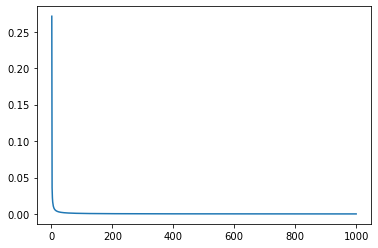

In [200]:
plt.plot([x for x in range(1,1001)], np.array(train_loss));

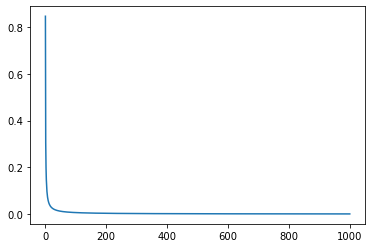

In [201]:
plt.plot([x for x in range(1,1001)], np.array(train_loss2));

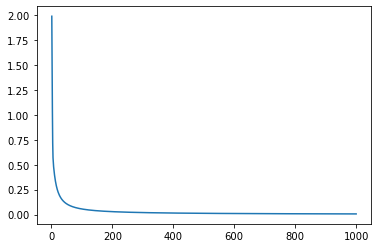

In [202]:
plt.plot([x for x in range(1,1001)], np.array(train_loss3));